<a href="https://colab.research.google.com/github/lianemm/CS216-project/blob/main/CS216_sharedcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
med_cols = ['insulin', 'metformin', 'change']  # medication variables of interest
control_cols = ['age', 'gender', 'admission_type_id', 'race', 'admission_source_id']
keep_cols = ['encounter_id', 'patient_nbr', 'time_in_hospital'] + med_cols + control_cols
present_cols = [c for c in keep_cols if c in df.columns]
df = df[present_cols].copy()
print("Using columns:", present_cols)

Using columns: ['encounter_id', 'patient_nbr', 'time_in_hospital', 'insulin', 'metformin', 'change', 'age', 'gender', 'admission_type_id', 'race', 'admission_source_id']


In [ ]:
med_change = df[df["change"]=="Ch"]
no_change = df[df["change"]=="No"]

#Liane's EDA, T-Test, Simple Linear Regression Model



In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats


df = pd.read_csv('diabetic_data.csv')
df.head()
#print(df.columns.tolist())




,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
cols = ["time_in_hospital", "insulin", "metformin", "pioglitazone", "rosiglitazone", "glipizide", "glyburide", "change"]
df_2 = df[cols].copy()

print(df.head())

print("\nMissing values per column:")
print(df_2.isnull().sum())

for c in ["insulin", "metformin", "change"]:
    df_2[c] = df_2[c].astype(str).str.strip().str.title()

print("\nDescriptive statistics for time_in_hospital:")
print(df_2["time_in_hospital"].describe())

print("\nAverage hospital stay by medication change:")
print(df_2.groupby("change")["time_in_hospital"].mean())

   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

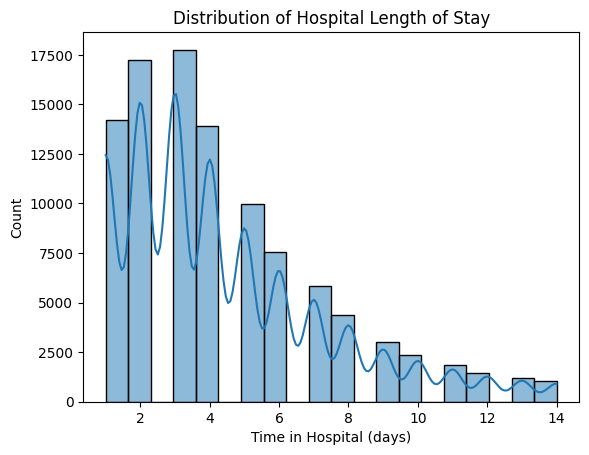

In [ ]:
sns.histplot(df_2["time_in_hospital"], bins=20, kde=True)
plt.title("Distribution of Hospital Length of Stay")
plt.xlabel("Time in Hospital (days)")
plt.ylabel("Count")
plt.show()


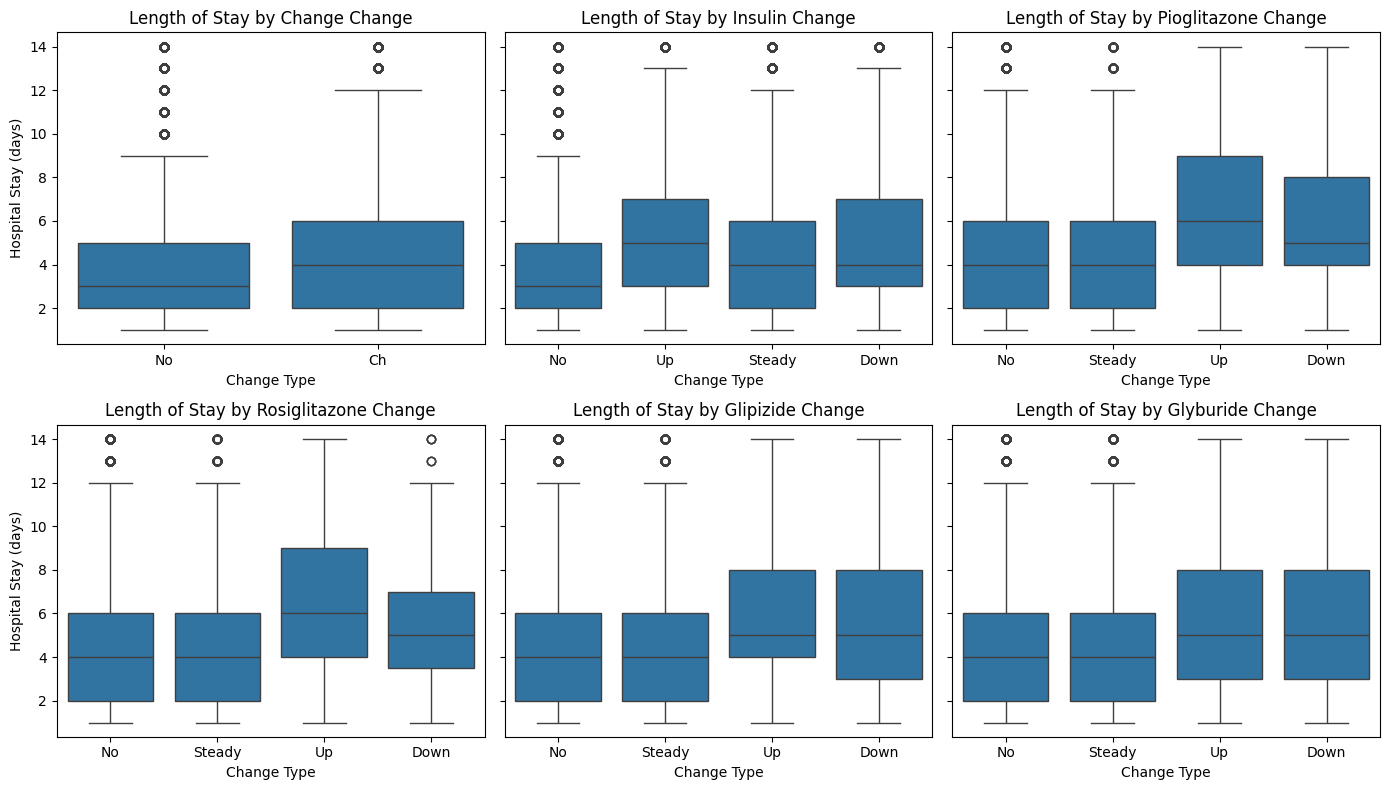

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8), sharey=True)

meds = ['change', 'insulin', 'pioglitazone', 'rosiglitazone', 'glipizide', 'glyburide']
for ax, med in zip(axes.flat, meds):
    sns.boxplot(x=med, y='time_in_hospital', data=df_2, ax=ax)
    ax.set_title(f"Length of Stay by {med.capitalize()} Change")
    ax.set_xlabel("Change Type")
    ax.set_ylabel("Hospital Stay (days)")

for ax in axes.flat[len(meds):]:
    ax.set_visible(False)

    #cite chat asking how to put my boxplots side by side

plt.tight_layout()
plt.show()


['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


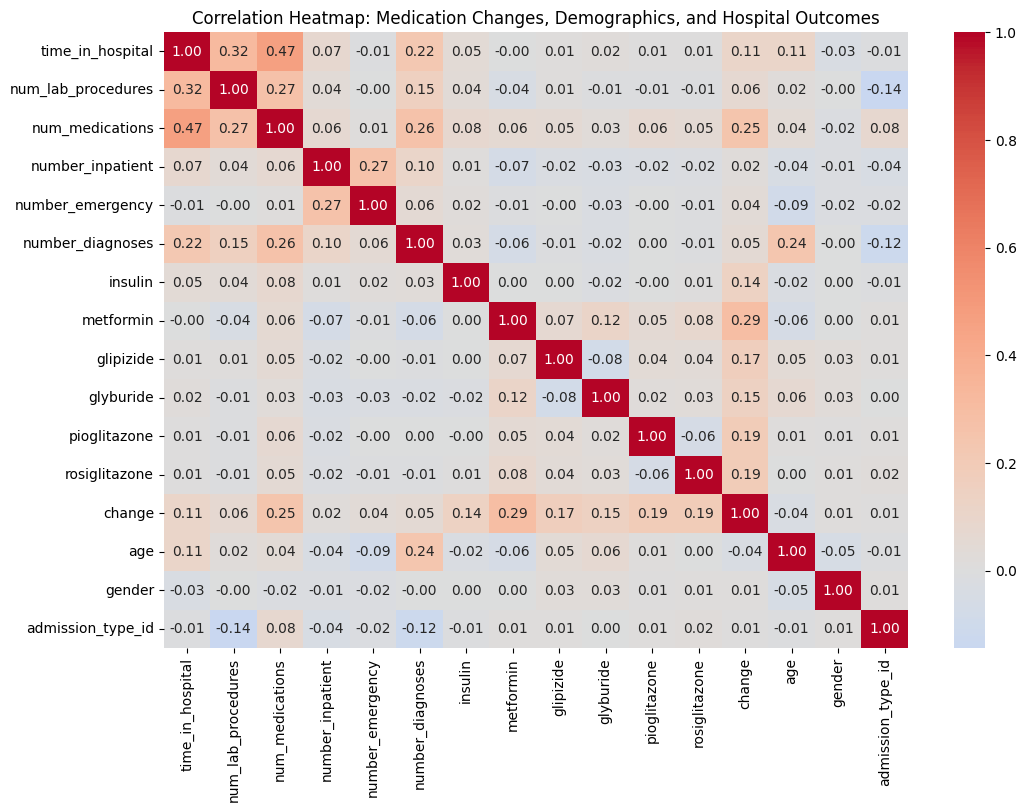

In [ ]:
print(df.columns.tolist())
cols = [
    'time_in_hospital', 'num_lab_procedures', 'num_medications',
    'number_inpatient', 'number_emergency', 'number_diagnoses',
    'insulin', 'metformin', 'glipizide', 'glyburide',
    'pioglitazone', 'rosiglitazone', 'change',
    'age', 'gender', 'admission_type_id'
]
df_3 = df[cols].copy()


#cleaning data
mapping = {'No': 0, 'Steady': 1, 'Up': 2, 'Down': -1}
for col in ['insulin', 'metformin', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone']:
    df_3[col] = df_3[col].astype(str).str.strip().str.title().map(mapping)

df_3['change'] = df_3['change'].astype(str).str.strip().str.title().map({'Ch': 1, 'Yes': 1, 'No': 0})

df_3['gender'] = df_3['gender'].astype(str).str.strip().str.title().map({'Male': 1, 'Female': 0})

def age_to_midpoint(age_str):
    if pd.isna(age_str):
        return None
    age_str = age_str.strip('[]()')
    parts = age_str.split('-')
    try:
        return (int(parts[0]) + int(parts[1])) / 2
    except:
        return None
df_3['age'] = df_3['age'].apply(age_to_midpoint)

df_corr = df_3.dropna().copy()

#correlation matrix
corr = df_corr.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap: Medication Changes, Demographics, and Hospital Outcomes")
plt.show()

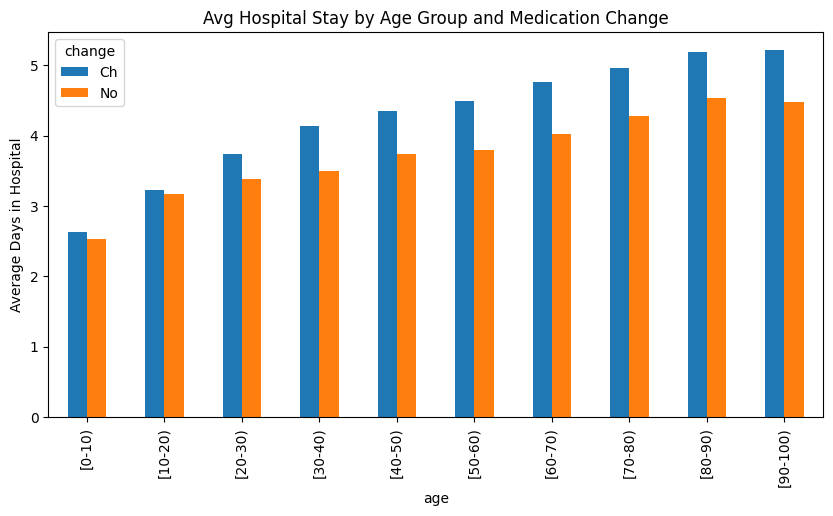

In [ ]:
df.groupby(['age', 'change'])['time_in_hospital'].mean().unstack().plot(kind='bar', figsize=(10,5))
plt.title('Avg Hospital Stay by Age Group and Medication Change')
plt.ylabel('Average Days in Hospital')
plt.show()


In [ ]:
from scipy import stats

df['change'] = df['change'].astype(str).str.strip().str.title()

changed = df[df['change'].isin(['Ch', 'Yes'])]['time_in_hospital'].dropna()
no_change = df[df['change'].isin(['No'])]['time_in_hospital'].dropna()

print(f"Mean (Change): {changed.mean():.2f}")
print(f"Mean (No Change): {no_change.mean():.2f}")

# Two-sample independent t-test
t_stat, p_val = stats.ttest_ind(changed, no_change, equal_var=False)
print(f"\nT-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.5f}")

if p_val < 0.05:
    print("statistically significant difference in hospital stay between patients with and without medication changes.")
else:
    print("No statistically significant difference found.")

    #if we want, we can do more ttests for more specific medications (insulin, etc.)


Mean (Change): 4.75
Mean (No Change): 4.09

T-statistic: 34.858
P-value: 0.00000
statistically significant difference in hospital stay between patients with and without medication changes.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression

df_model = df_3.dropna().copy()

categorical_features = ['change', 'gender', 'admission_type_id']
numerical_features = ['num_lab_procedures', 'num_medications',
                      'number_inpatient', 'number_emergency',
                      'number_diagnoses', 'insulin', 'metformin',
                      'glipizide', 'glyburide', 'pioglitazone',
                      'rosiglitazone', 'age']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') #need to cite chat here
encoded = encoder.fit_transform(df_model[categorical_features])

feature_names = numerical_features + list(encoder.get_feature_names_out(categorical_features))
X = pd.DataFrame(
    np.column_stack([df_model[numerical_features].values, encoded]),
    columns=feature_names
)
y = df_model['time_in_hospital']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Evaluation Metrics on Test Set:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


Evaluation Metrics on Test Set:
MSE: 6.3891
RMSE: 2.5277
R²: 0.2813


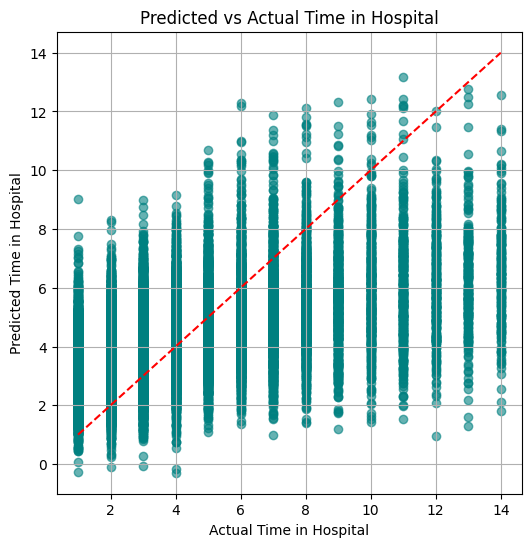

/tmp/ipython-input-3621343443.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefs.values, y=coefs.index, palette="coolwarm")


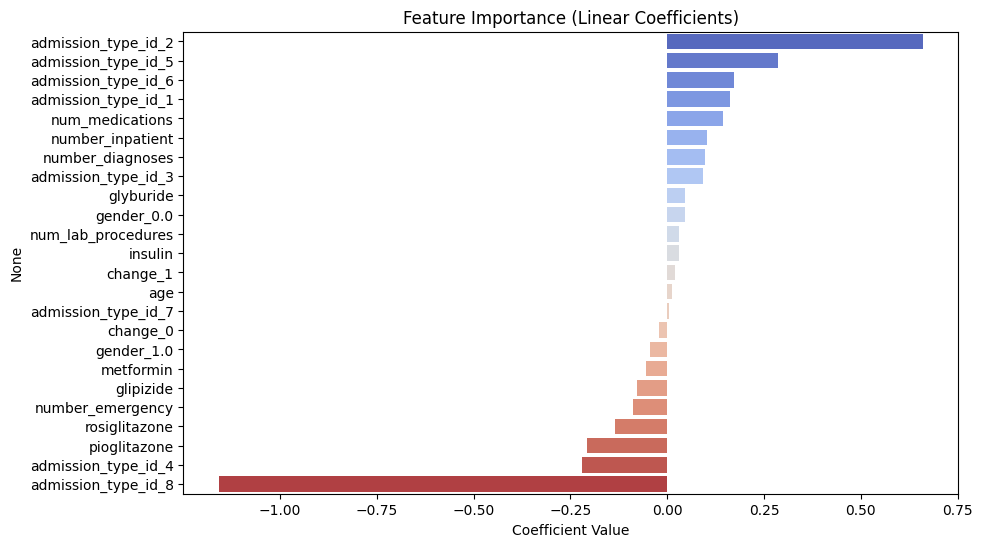

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Time in Hospital")
plt.ylabel("Predicted Time in Hospital")
plt.title("Predicted vs Actual Time in Hospital")
plt.grid(True)
plt.show()

#not sure if this is the best graph, but i tried box and bar and they weren't good either lol

coefs = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=coefs.values, y=coefs.index, palette="coolwarm")
plt.title("Feature Importance (Linear Coefficients)")
plt.xlabel("Coefficient Value")
plt.show()

In [ ]:
# ( wanted to explore whether coefficients were significant; Chat suggested using f_regression)
f_stats, p_vals = f_regression(X_train, y_train)

significance = pd.DataFrame({
    'Feature': X_train.columns,
    'F-stat': f_stats,
    'p-value': p_vals
}).sort_values('p-value')

print("\nTop 15 Most Statistically Significant Predictors:")
print(significance.head(15))



Top 15 Most Statistically Significant Predictors:
                Feature        F-stat        p-value
0    num_lab_procedures   9137.487112   0.000000e+00
1       num_medications  22450.260404   0.000000e+00
4      number_diagnoses   4150.560412   0.000000e+00
13             change_1    998.022846  1.010050e-217
12             change_0    998.022846  1.010050e-217
11                  age    979.579185  9.231348e-214
2      number_inpatient    458.770610  1.699422e-101
5               insulin    194.913778   3.026465e-44
17  admission_type_id_2     91.009346   1.467577e-21
20  admission_type_id_5     87.110185   1.051147e-20
14           gender_0.0     63.277823   1.818040e-15
15           gender_1.0     63.277823   1.818040e-15
23  admission_type_id_8     60.132492   8.970484e-15
8             glyburide     26.208260   3.072045e-07
21  admission_type_id_6     19.922436   8.075636e-06


# Angel's Code

<Axes: xlabel='change', ylabel='time_in_hospital'>

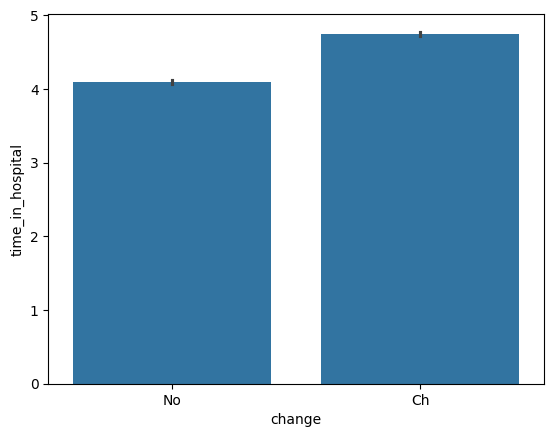

In [ ]:
#Chart for just change in medication
sns.barplot(data=df,
    x="change",
    y="time_in_hospital", errorbar="ci")

<Axes: xlabel='citoglipton', ylabel='time_in_hospital'>

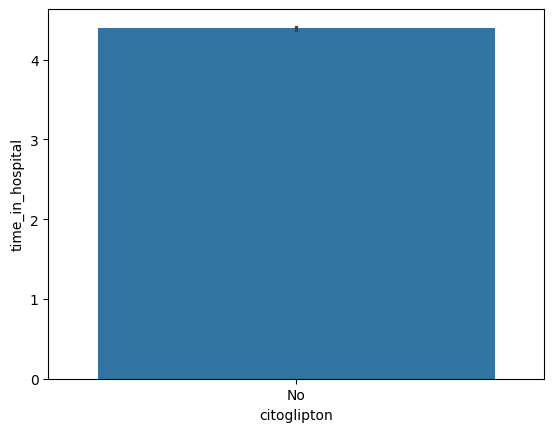

In [ ]:
#Chart for change in citoglipton
sns.barplot(data=df,
    x="citoglipton",
    y="time_in_hospital", errorbar="ci")

<Axes: xlabel='insulin', ylabel='time_in_hospital'>

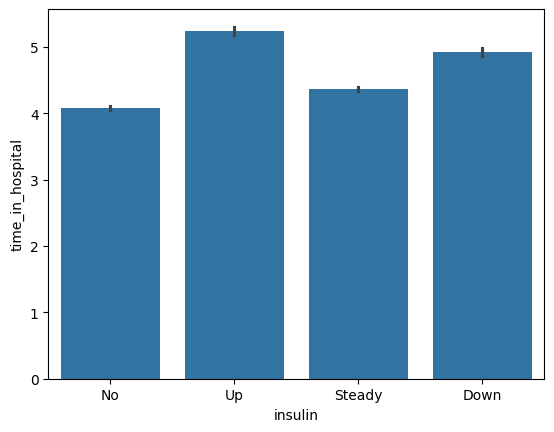

In [ ]:
#Chart for insulin
sns.barplot(data=df,
    x="insulin",
    y="time_in_hospital", errorbar="ci")

<Axes: xlabel='glyburide-metformin', ylabel='time_in_hospital'>

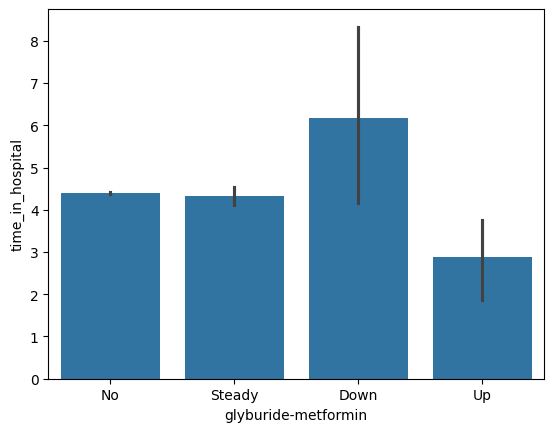

In [ ]:
#Chart for glyburide-metformin
sns.barplot(data=df,
    x="glyburide-metformin",
    y="time_in_hospital", errorbar="ci")

<Axes: xlabel='glipizide-metformin', ylabel='time_in_hospital'>

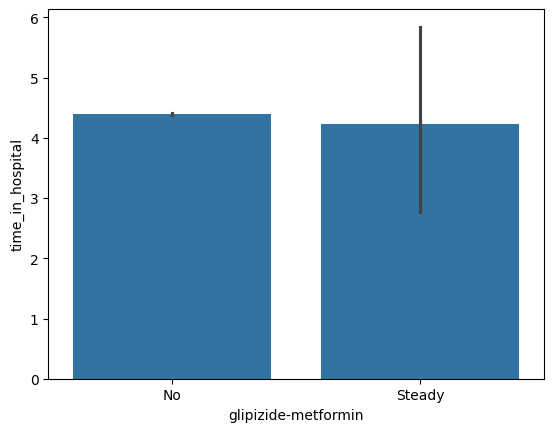

In [ ]:
#Chart for glipizide-metformin
sns.barplot(data=df,
    x="glipizide-metformin",
    y="time_in_hospital", errorbar="ci")

<Axes: xlabel='glimepiride-pioglitazone', ylabel='time_in_hospital'>

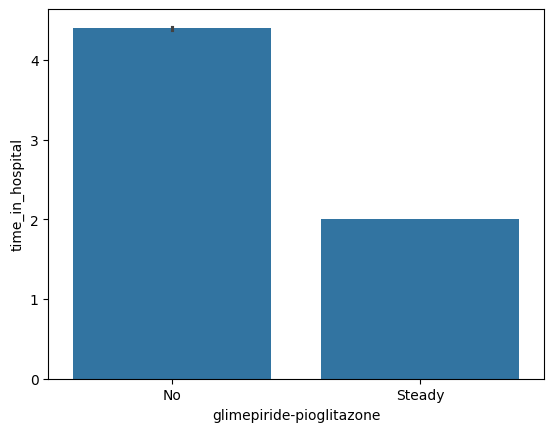

In [ ]:
#Chart for glimepiride-pioglitazone
sns.barplot(data=df,
    x="glimepiride-pioglitazone",
    y="time_in_hospital", errorbar="ci")

<Axes: xlabel='metformin-rosiglitazone', ylabel='time_in_hospital'>

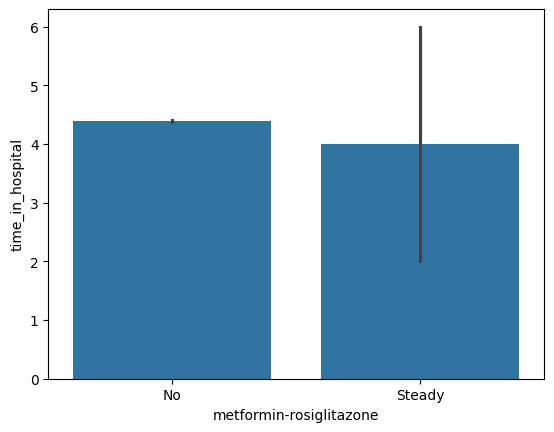

In [ ]:
#Chart for metformin-rosiglitazone
sns.barplot(data=df,
    x="metformin-rosiglitazone",
    y="time_in_hospital", errorbar="ci")

<Axes: xlabel='metformin-pioglitazone', ylabel='time_in_hospital'>

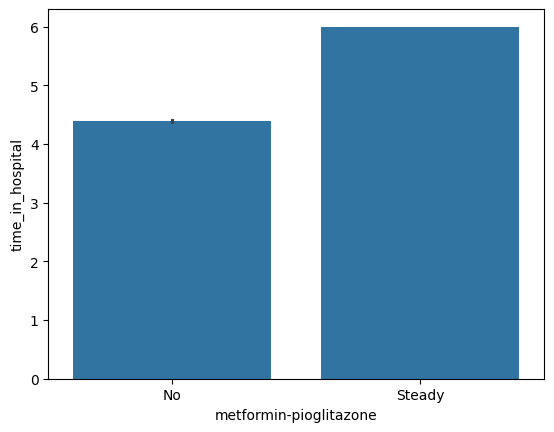

In [ ]:
#Chart for metformin-pioglitazone
sns.barplot(data=df,
    x="metformin-pioglitazone",
    y="time_in_hospital", errorbar="ci")

<Axes: xlabel='metformin-pioglitazone', ylabel='time_in_hospital'>

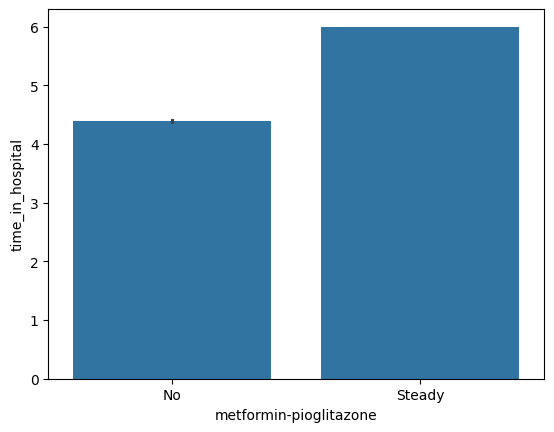

In [ ]:
#Chart for everything
sns.barplot(data=df,
    x="metformin-pioglitazone",
    y="time_in_hospital", errorbar="ci")

In [ ]:
#Reformat the DF to create rows for each medication and change

kept_cols = df[["time_in_hospital",
                "citoglipton",
                    "insulin",
                    "glyburide-metformin",
                    "glipizide-metformin",
                    "glimepiride-pioglitazone",
                    "metformin-rosiglitazone",
                    "metformin-pioglitazone"]]

df_long = kept_cols.melt(
    id_vars="time_in_hospital",
    value_vars=kept_cols,
    var_name="medication",
    value_name="any_change"
)

print(df_long.head())

   time_in_hospital   medication any_change
0                 1  citoglipton         No
1                 3  citoglipton         No
2                 2  citoglipton         No
3                 2  citoglipton         No
4                 1  citoglipton         No


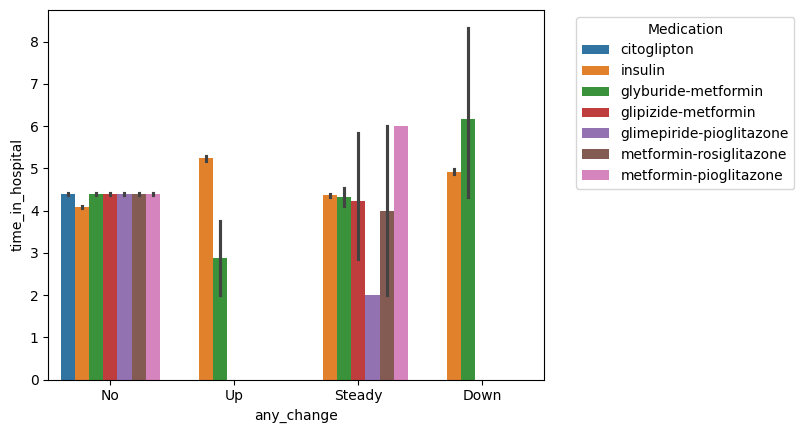

In [ ]:
#Chart comparing all medications

sns.barplot(data=df_long,
    x="any_change",
    y="time_in_hospital",
    hue="medication",
    errorbar="ci")

#Move the legend outside the plot
plt.legend(
    title="Medication",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)